In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

np.set_printoptions(precision=3, suppress=True)


In [2]:
raw_dataset = pd.read_csv("data\\f_covae_training.tsv", na_values='?', sep="\t")

df = raw_dataset.copy()

In [3]:
# Preparing the data
df = df.iloc[:, 1:]  # Remove the first column (ID)
X = df.iloc[:, :-697]  # Features
y = df.iloc[:, -697:]  # Labels

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=7)

In [4]:
# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(697, activation='sigmoid')) 

In [5]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
68/68 [==============================] - 1s 5ms/step - loss: 63.4130 - accuracy: 0.0069 - val_loss: 1.6772 - val_accuracy: 0.0148
Epoch 2/10
68/68 [==============================] - 0s 2ms/step - loss: 1.0424 - accuracy: 0.0134 - val_loss: 1.0995 - val_accuracy: 0.0000e+00
Epoch 3/10
68/68 [==============================] - 0s 2ms/step - loss: 0.7100 - accuracy: 0.0101 - val_loss: 0.8663 - val_accuracy: 0.0369
Epoch 4/10
68/68 [==============================] - 0s 2ms/step - loss: 0.5516 - accuracy: 0.0111 - val_loss: 0.7122 - val_accuracy: 0.0000e+00
Epoch 5/10
68/68 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.0101 - val_loss: 0.6272 - val_accuracy: 0.0295
Epoch 6/10
68/68 [==============================] - 0s 2ms/step - loss: 0.3602 - accuracy: 0.0148 - val_loss: 0.5307 - val_accuracy: 0.0000e+00
Epoch 7/10
68/68 [==============================] - 0s 2ms/step - loss: 0.3156 - accuracy: 0.0161 - val_loss: 0.4541 - val_accuracy: 0.0111
Epoch 8

In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)

9/9 [==============================] - 0s 1ms/step - loss: 0.2552 - accuracy: 0.0037
Accuracy: 0.0036764706019312143


In [8]:
# Make predictions
predictions = model.predict(X_test)

9/9 [==============================] - 0s 1ms/step


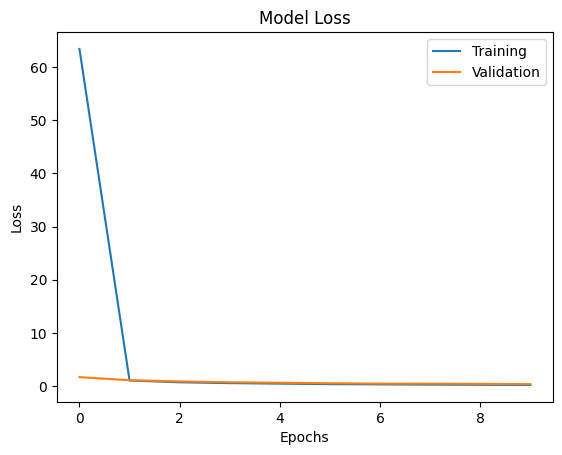

In [9]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()

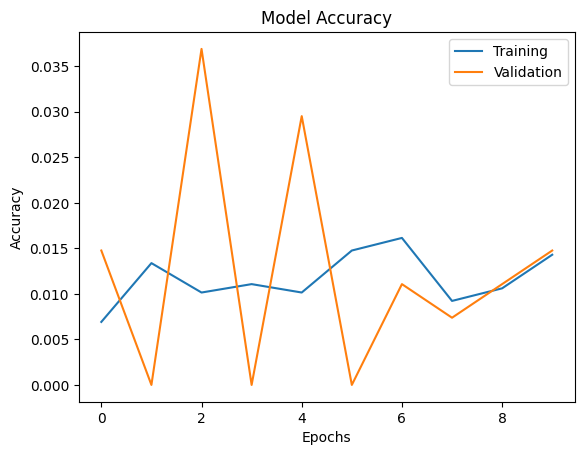

In [11]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.show()